# Scikit-learn Tutorial

# Representation and Visualization of Data

Machine learning is about fitting models to data. We'll start by
- how data can be represented in order to be understood by the computer.
- how data can be visualized using matplotlib


## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of shape `[n_samples, n_features]`.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a 
  - document
  - picture
  - sound
  - video
  - row in database or CSV file,
  
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be Boolean or
  discrete-valued in some cases.



### A Simple Example: the Iris Dataset

The data consists of measurements of three different iris flower species.  There are three different species of iris
in this particular dataset as illustrated below:

Iris Setosa
<img src="figures/iris_setosa.jpg" width="50%">

Iris Versicolor
<img src="figures/iris_versicolor.jpg" width="50%">

Iris Virginica
<img src="figures/iris_virginica.jpg" width="50%">



### Loading the Iris Data with Scikit-learn

Taken from the [UCI machine learning repository](http://archive.ics.uci.edu/ml/), which hosts many of the commonly used datasets that are useful for benchmarking machine learning algorithms -- a very popular resource for machine learning practioners and researchers. Conveniently, some of these datasets are already included in scikit-learn.

For example, scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

<img src="figures/petal_sepal.jpg" alt="Sepal" style="width: 50%;"/>

(Image: "Petal-sepal". Licensed under CC BY-SA 3.0 via Wikimedia Commons - https://commons.wikimedia.org/wiki/File:Petal-sepal.jpg#/media/File:Petal-sepal.jpg)

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils.Bunch

The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [2]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [3]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

('Number of samples:', 150L)
('Number of features:', 4L)
[ 5.1  3.5  1.4  0.2]


In [4]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [5]:
print(iris.data.shape)
print(iris.target.shape)

(150L, 4L)
(150L,)


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

Using the NumPy's bincount function (above), we can see that the classes are distributed uniformly in this dataset - there are 50 flowers from each species, where

- class 0: Iris-Setosa
- class 1: Iris-Versicolor
- class 2: Iris-Virginica

These class names are stored in the last attribute, namely ``target_names``:

In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize one or two of the dimensions
at a time using a simple histogram or scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

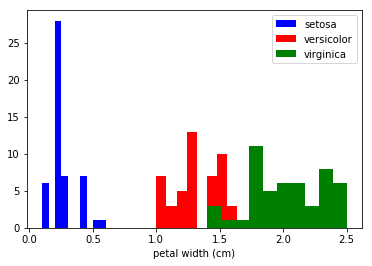

In [10]:
x_index = 3  # petal width
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             color=color)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

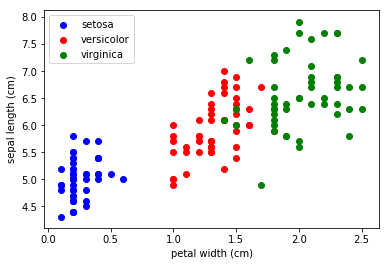

In [11]:
x_index = 3 # petal width
y_index = 0 # sepal length

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

### Quick Exercise:

**Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**

This exercise is a preview of **dimensionality reduction**, which we'll see later.

###  scatterplot matrices

Instead of looking at the data one plot at a time, a common tool that analysts use is called the **scatterplot matrix**.

Scatterplot matrices show scatter plots between all features in the data set, as well as histograms to show the distribution of each feature.

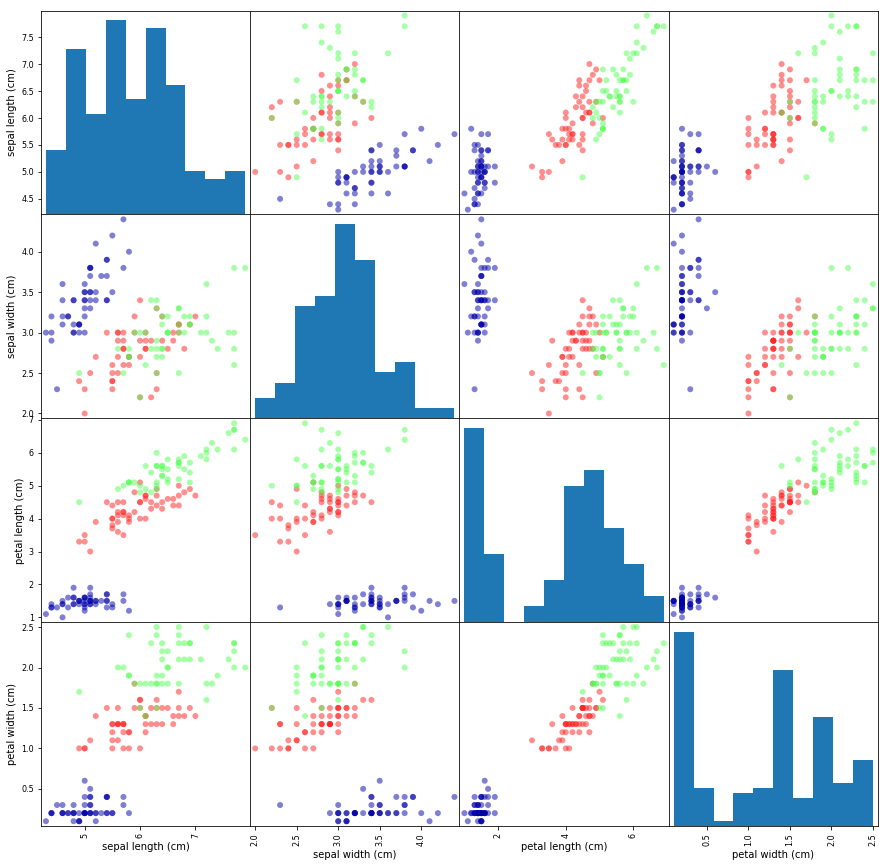

In [13]:
import pandas as pd
import mglearn
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), c=iris.target, marker='o', cmap=mglearn.cm3);